# Summary:
- 1. Import libraries
- 2. Import data
- 3. Metadata
    - 3.1. Rename columns
    - 3.2. Change index
- 4. Explore the data
    - 4.1. Inspecting data shape, data types and missing values
    - 4.2. Basic descriptive statistics
    - 4.3. Identifying duplicated records
- 5. Modify the data
    - 5.1. Correct categorical values
        - 5.1.1. fuel_type
        - 5.1.2. transmission
        - 5.1.3. brand
        - 5.1.4. model
    - 5.2. Change data types
        - 5.2.1. year and previous_owners: should be integer
        - 5.2.2. has_damage: should/can be boolean
        - 5.2.3. Confirmation
    - 5.3. Fix mistakes
        - 5.3.1. previous_owners, mileage, mpg, engine_size, tax: have negative values 
        - 5.3.2. paint_quality: has percentage bigger than 100
        - 5.3.3. has_damage: is always 0. No car has damage?
    - 5.4. Remove outliers
    - 5.5. Data separation
    - 5.6. Fill missing values
        - 5.6.1. Year
        - 5.6.2. Mileage
        - 5.6.3. Tax
        - 5.6.4. Mpg
        - 5.6.5. Engine size
        - 5.6.6. Paint quality
        - 5.6.7. Previous
        - 5.6.8. Has damage
        - 5.6.9. Brand
        - 5.6.10. Model
        - 5.6.11.Transmission
        - 5.6.12. Fuel type
        - 5.6.13. Confirmation
    - 5.7. Feature engineering
    - 5.8. Normalize data
- 6. Feature selection
- 7. Function with every change so far
- 8. Modelling (create a predictive model)
- 9. Assess (evaluate model)
- 10. Deploy (apply to real data)

# 1. Import libraries

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

sns.set()
sns.set_theme(style="white")

# data partition
from sklearn.model_selection import train_test_split

# filter methods: spearman and chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

# 2. Import data

In [141]:
train_data = pd.read_csv('data/train.csv', sep = ",")
test_data = pd.read_csv('data/test.csv', sep = ",")

In [142]:
train_data.head(2)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.0,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.0,0.0


In [143]:
test_data.head(2)

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0


# 3. Metadata

`carID` : An attribute that contains an identifier for each car. <br>
`Brand` : The car’s main brand (e.g. Ford, Toyota). <br>
`model` : The car model. <br>
`year`: The year of Registration of the Car. <br>
`price (Output)` : The car’s price when purchased by Cars 4 You (in £). <br>
`transmission` : The kind of transmission (Manual, Semi-auto, Auto). <br>
`mileage`: The total reported distance travelled by the car (in miles). <br>
`fuelType`: Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric). <br>
`tax`: The amount of road tax (in £) that, in 2020, was applicable to the car in question. <br>
`mpg`: Average Miles per Gallon. <br>
`engineSize`: Size of Engine in liters (Cubic Decimeters). <br>
`paintQuality%`: The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation). <br>
`previousOwners`: Number of previous registered owners of the vehicle. <br>
`hasDamage`: Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not. <br>

## 3.1. Rename columns

In [144]:
# Function that renames the df columns
def rename_columns(df):
    """ This function receives a DataFrame with the cars data as input and renames its columns."""

    # Rename columns for easier access
    df.rename(columns = {'carID': 'car_id',
                           'Brand': 'brand',
                           'fuelType': 'fuel_type',
                           'engineSize': 'engine_size',
                           'paintQuality%': 'paint_quality',
                           'previousOwners': 'previous_owners',
                           'hasDamage': 'has_damage'}, inplace=True)

In [145]:
rename_columns(train_data)
train_data.columns

Index(['car_id', 'brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuel_type', 'tax', 'mpg', 'engine_size', 'paint_quality',
       'previous_owners', 'has_damage'],
      dtype='object')

## 3.2. Change index

In [146]:
#check if ID's are unique
len(train_data) == len(train_data.car_id.unique())

True

In [147]:
# Define the variable carID as the new index
def change_index(df):
    ''' This function receives a DataFrame with the cars data as input and sets the column car_id as the new index. '''
    df.set_index('car_id', inplace = True)

In [184]:
change_index(train_data)
train_data.head(5)

KeyError: "None of ['car_id'] are in the columns"

# 4. Explore the data

In [149]:
train_data.head()

,brand,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners,has_damage
car_id,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [150]:
train_data.tail()

,brand,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners,has_damage
car_id,,,,,,,,,,,,,
37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


## 4.1. Inspecting data shape, data types and missing values

In [151]:
# Check the number of rows and columns of the data
train_data.shape

(75973, 13)

In [152]:
# Check the data types of each column
train_data.dtypes

brand               object
model               object
year               float64
price                int64
transmission        object
mileage            float64
fuel_type           object
tax                float64
mpg                float64
engine_size        float64
paint_quality      float64
previous_owners    float64
has_damage         float64
dtype: object

- The variables year and previous_owners should be integers instead of floats.
- The variable has_damage should be a boolean instead of float.

In [153]:
# Check for any missing values
train_data.replace('', np.nan, inplace=True)

train_data.isna().sum()

brand              1521
model              1517
year               1491
price                 0
transmission       1522
mileage            1463
fuel_type          1511
tax                7904
mpg                7926
engine_size        1516
paint_quality      1524
previous_owners    1550
has_damage         1548
dtype: int64

- The only column having no nulls seems to be price. Every other variable needs to be checked.

## 4.2. Basic descriptive statistics

In [154]:
# Calculate the basic descriptive statistics of the data
train_data.describe(include = "all").round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.1,2.21,1970.0,2016.0,2017.0,2019.0,2024.12
price,75973.0,NaN,NaN,NaN,16881.89,9736.93,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.18,22129.79,-58540.57,7423.25,17300.0,32427.5,323000.0
fuel_type,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.33,65.52,-91.12,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.15,16.5,-43.42,46.3,54.3,62.8,470.8
engine_size,74457.0,NaN,NaN,NaN,1.66,0.57,-0.1,1.2,1.6,2.0,6.6


- All of our metric variables present significant disparities between maximum value and mean, such as:
    - price - max value of around 160K VS mean of 16K
    - mileage - max value of 323K VS mean of 23K
    - tax - max value of 580 VS mean of 120
    - mpg - max value of 470 VS mean of 55
    - engine_size - max value of 6 VS mean of 1.7
    - paint_quality - max value of 125 VS mean of 64
    - previous_owners - max value of 6 VS 1.9

We need to look out for potential outliers: perhaps top of the range cars.

- A lot of our metric variables present negative values when these should not be possible, such as:
    - mileage: min value of -58K
    - tax: min value of -91
    - mpg: min value of -43
    - engine_size: min value of -0.1
    - previous_owners: min value of -2
- More inconsistencies:
    - pain_quality: has percentage bigger than 100
    - has_damage: is always 0 → no car has damage?
    - transmission: should only have 3/4 unique values
    - fuel_type: should only have 4/5 unique values

We need to decide how to fix these.

## 4.3. Identifying duplicated records

In [155]:
# Check for any duplicated observations
train_data.duplicated().sum()

np.int64(4)

In [156]:
# Display duplicated observations if any
train_data[train_data.duplicated(keep=False)].sort_values(by=['brand', 'model', 'year', 'price'])

,brand,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners,has_damage
car_id,,,,,,,,,,,,,
23477,Ford,Focus,2017.0,14000,Automatic,9137.0,Petrol,NaN,NaN,1.0,48.0,4.0,0.0
25766,Ford,Focus,2017.0,14000,Automatic,9137.0,Petrol,NaN,NaN,1.0,48.0,4.0,0.0
15152,Ford,Focus,2018.0,13500,Manual,11382.0,Petrol,NaN,NaN,1.0,57.0,4.0,0.0
21404,Ford,Focus,2018.0,13500,Manual,11382.0,Petrol,NaN,NaN,1.0,57.0,4.0,0.0
33774,Hyundai,I10,2017.0,7500,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4.0,0.0
34128,Hyundai,I10,2017.0,7500,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4.0,0.0
33890,Hyundai,Ioniq,2019.0,23991,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3.0,0.0
34301,Hyundai,Ioniq,2019.0,23991,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3.0,0.0


In [157]:
# Percentage of data kept if we remove duplicated observations
round((len(train_data.drop_duplicates())*100)/len(train_data), 2)

99.99

In [158]:
# Remove duplicated observations
train_data.drop_duplicates(inplace=True)

- Even though the duplicated rows are associated to different car ids all the other columns are 100% identic. It is unusual to have two or more cars with the exact same mileage, tax, paint quality and previous owners for example. This gives the perception that these cars were included in the system twice by mistake (human error perhaps). Given that it makes sense to keep only the first occurrence of each duplicated row.

# 5. Modify the data

Let's divide the columns into metric and non-metric features.

In [159]:
independent_columns = train_data.columns.drop('price')
categorical_columns = ['brand', 'model', 'transmission', 'fuel_type']
numeric_columns = list(independent_columns.drop(categorical_columns))

<span style='color: red;'>year é numeric ou categorical?????</span>

In [160]:
# Get the unique values for each column of the data
for name in categorical_columns:
    print(f"{name}: \n{train_data[name].unique()}")

brand: 
['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
model: 
[' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 ' i20' ' Rapid' ' a1' ' Auris

Most of our variables are having inconsistent data:
- brand for example is having multiple values for the same brand, such as BMW (BMW, BM, MW): we need to clean this variable.
- model, similarly to brand is having too many unique values. We might need to group these values and classify them. 
- The same applies for transmission and fuel_type

## 5.1. Correct categorical values

In [161]:
train_data[categorical_columns].head()

,brand,model,transmission,fuel_type
car_id,,,,
69512,VW,Golf,Semi-Auto,Petrol
53000,Toyota,Yaris,Manual,Petrol
6366,Audi,Q2,Semi-Auto,Petrol
29021,Ford,FIESTA,anual,Petrol
10062,BMW,2 Series,Manual,Petrol


### 5.1.1. fuel_type

In [162]:
train_data.fuel_type.unique()

array(['Petrol', 'Diesel', 'etrol', 'Hybrid', 'diesel', 'iesel', nan,
       'petrol', 'PETROL', 'Diese', 'Petro', 'DIESEL', 'petro', 'HYBRID',
       'ybri', 'Other', 'DIESE', 'Hybri', 'ETROL', 'ybrid', 'PETRO',
       'hybrid', 'IESEL', 'Electric', 'ther', 'iese', 'etro', 'ETRO',
       'diese', 'Othe', 'YBRID', 'HYBRI', 'OTHER', 'other', 'IESE'],
      dtype=object)

##### Possible Types of Fuel

- Petrol
- Diesel
-  Hybrid
- Electric

In [163]:
fuels = ['Petrol', 'Hybrid', 'Diesel', 'Unknown', 'Other', 'Electric']

In [164]:
# Function to standardize fuel types
def replace_fuel(fuel_given):
    """Replaces various representations of fuel types with standardized names."""

    if pd.isna(fuel_given):                                                               # In case of missing value keep as NaN
        return np.nan
    
    # Else standardize fuel names     
    fuel_given = fuel_given.upper().strip()        # Convert to uppercase for easier matching and remove leading/trailing spaces
    
    new_fuel = []
    
    for fuel in fuels:                                                  # Check if the given fuel is one of the existing options
        if fuel_given in fuel.upper():
            new_fuel.append(fuel)
    
    if len(new_fuel)==1:                                                         # If there's only one possible option return it
        return new_fuel[0]
    else:                                     # Else we would get a new unique value telling us what kind of mistake to look for
        return f'Check: {fuel_given}'

In [165]:
# (THIS CELL IS TO BE REMOVED AFTER TESTING TO AVOID REDUNDANCY)
# Test the function before applying it to the dataset
fuel_types = train_data['fuel_type'].unique()
for fuel in fuel_types:
    print(f"{fuel} => {replace_fuel(fuel)}")

Petrol => Petrol
Diesel => Diesel
etrol => Petrol
Hybrid => Hybrid
diesel => Diesel
iesel => Diesel
nan => nan
petrol => Petrol
PETROL => Petrol
Diese => Diesel
Petro => Petrol
DIESEL => Diesel
petro => Petrol
HYBRID => Hybrid
ybri => Hybrid
Other => Other
DIESE => Diesel
Hybri => Hybrid
ETROL => Petrol
ybrid => Hybrid
PETRO => Petrol
hybrid => Hybrid
IESEL => Diesel
Electric => Electric
ther => Other
iese => Diesel
etro => Petrol
ETRO => Petrol
diese => Diesel
Othe => Other
YBRID => Hybrid
HYBRI => Hybrid
OTHER => Other
other => Other
IESE => Diesel


In [166]:
# Apply the function to standardize fuel type in the 'fuel type' column
train_data['fuel_type'] = train_data['fuel_type'].apply(replace_fuel)
train_data['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Hybrid', nan, 'Other', 'Electric'],
      dtype=object)

### 5.1.2. transmission

In [167]:
train_data.transmission.unique()

array(['Semi-Auto', 'Manual', 'anual', 'Semi-Aut', 'Automatic', 'manual',
       nan, 'unknown', 'Manua', 'AUTOMATIC', 'MANUAL', 'semi-auto',
       ' Manual ', 'automatic', 'emi-Auto', 'SEMI-AUTO', 'SEMI-AUT',
       'Automati', 'ANUAL', 'utomatic', 'unknow', 'EMI-AUTO', 'manua',
       'anua', 'emi-Aut', 'MANUA', 'emi-auto', 'UTOMATIC', ' manual ',
       ' MANUAL ', 'UNKNOWN', 'nknown', 'automati', 'Other', 'semi-aut',
       ' Manual', 'AUTOMATI', 'utomati', 'Manual ', 'manual ', 'nknow'],
      dtype=object)

##### Possible Types of Transmission in our dataset

- Manual
- Automatic
- Semi-Automatic

In [168]:
transmissions = ['Semi-Auto', 'Automatic', 'Manual', 'Unknown', 'Other']

In [169]:
# Function to standardize transmission types
def replace_transmission(transmission_given):
    """Replaces various representations of transmission types with standardized names."""

    if pd.isna(transmission_given):                                                       # In case of missing value keep as NaN
        return np.nan
       
    # Else standardize transmission names     
    transmission_given = transmission_given.upper().strip()        # Convert to uppercase for easier matching and remove leading/trailing spaces
    
    new_transmission = []
    
    for transmission in transmissions:                          # Check if the given transmission is one of the existing options
        if transmission_given in transmission.upper():
            new_transmission.append(transmission)
    
    if len(new_transmission)==1:                                                 # If there's only one possible option return it
        return new_transmission[0]
    else:                                     # Else we would get a new unique value telling us what kind of mistake to look for
        return f'Check: {transmission_given}'

In [170]:
# (THIS CELL IS TO BE REMOVED AFTER TESTING TO AVOID REDUNDANCY)
# Test the function before applying it to the dataset
transmission_types = train_data['transmission'].unique()
for transmission in transmission_types:
    print(f"{transmission} => {replace_transmission(transmission)}")

Semi-Auto => Semi-Auto
Manual => Manual
anual => Manual
Semi-Aut => Semi-Auto
Automatic => Automatic
manual => Manual
nan => nan
unknown => Unknown
Manua => Manual
AUTOMATIC => Automatic
MANUAL => Manual
semi-auto => Semi-Auto
 Manual  => Manual
automatic => Automatic
emi-Auto => Semi-Auto
SEMI-AUTO => Semi-Auto
SEMI-AUT => Semi-Auto
Automati => Automatic
ANUAL => Manual
utomatic => Automatic
unknow => Unknown
EMI-AUTO => Semi-Auto
manua => Manual
anua => Manual
emi-Aut => Semi-Auto
MANUA => Manual
emi-auto => Semi-Auto
UTOMATIC => Automatic
 manual  => Manual
 MANUAL  => Manual
UNKNOWN => Unknown
nknown => Unknown
automati => Automatic
Other => Other
semi-aut => Semi-Auto
 Manual => Manual
AUTOMATI => Automatic
utomati => Automatic
Manual  => Manual
manual  => Manual
nknow => Unknown


In [171]:
# Apply the function to standardize transmission type in the 'transmission' column
train_data['transmission'] = train_data['transmission'].apply(replace_transmission)
train_data['transmission'].unique()

array(['Semi-Auto', 'Manual', 'Automatic', nan, 'Unknown', 'Other'],
      dtype=object)

### 5.1.3. brand

In [172]:
train_data.brand.unique()

array(['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
       'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', nan,
       'yundai', 'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel',
       'For', 'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD',
       'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA',
       'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod',
       'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI',
       'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede',
       'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod',
       'toyot'], dtype=object)

##### Possible Brands in our dataset:
- VW
- BMW
- Toyota
- Audi
- Ford
- Skoda
- Opel
- Mercedes
- Hyundai

In [173]:
brands = ['VW', 'BMW', 'Toyota', 'Audi', 'Skoda', 'Opel', 'Ford', 'Mercedes', 'Hyundai', 'Unknown']

In [174]:
# Function to standardize brand types
def replace_brand(brand_given):
    """Replaces various representations of brand types with standardized names."""

    if pd.isna(brand_given):                                                              # In case of missing value keep as NaN
        return np.nan
       
    # Else standardize brand names     
    brand_given = brand_given.upper().strip()           # Convert to uppercase for easier matching and remove leading/trailing spaces
    
    new_brand = []
    
    for brand in brands:                                               # Check if the given brand is one of the existing options
        if brand_given in brand.upper():
            new_brand.append(brand)
    
    if len(new_brand)==1:                                                        # If there's only one possible option return it
        return new_brand[0]
    elif len(new_brand)>1 and 'VW' in new_brand:        # The else condition showed 'W' was raising an error, but with the code: train_data[(train_data.brand == 'w') | (train_data.brand == 'W')].model.unique(); we can see all W's are VW models
        return 'VW'
    else:                                     # Else we would get a new unique value telling us what kind of mistake to look for
        return f'Check: {brand_given}'

In [175]:
# (THIS CELL IS TO BE REMOVED AFTER TESTING TO AVOID REDUNDANCY)
# Test the function before applying it to the dataset
brand_types = train_data['brand'].unique()
for brand in brand_types:
    print(f"{brand} => {replace_brand(brand)}")

VW => VW
Toyota => Toyota
Audi => Audi
Ford => Ford
BMW => BMW
Skoda => Skoda
Opel => Opel
Mercedes => Mercedes
FOR => Ford
mercedes => Mercedes
Hyundai => Hyundai
w => VW
ord => Ford
MW => BMW
bmw => BMW
nan => nan
yundai => Hyundai
BM => BMW
Toyot => Toyota
udi => Audi
Ope => Opel
AUDI => Audi
V => VW
opel => Opel
pel => Opel
For => Ford
pe => Opel
Mercede => Mercedes
audi => Audi
MERCEDES => Mercedes
OPEL => Opel
koda => Skoda
FORD => Ford
Hyunda => Hyundai
W => VW
Aud => Audi
vw => VW
hyundai => Hyundai
skoda => Skoda
ford => Ford
TOYOTA => Toyota
ercedes => Mercedes
oyota => Toyota
toyota => Toyota
SKODA => Skoda
Skod => Skoda
HYUNDAI => Hyundai
kod => Skoda
v => VW
for => Ford
SKOD => Skoda
aud => Audi
KODA => Skoda
PEL => Opel
yunda => Hyundai
or => Ford
UDI => Audi
OYOTA => Toyota
HYUNDA => Hyundai
mw => BMW
OPE => Opel
mercede => Mercedes
ERCEDES => Mercedes
ercede => Mercedes
TOYOT => Toyota
MERCEDE => Mercedes
ORD => Ford
ud => Audi
ope => Opel
AUD => Audi
hyunda => Hyundai


In [176]:
# Apply the function to standardize brand names in the 'brand' column
train_data['brand'] = train_data['brand'].apply(replace_brand)
train_data['brand'].unique()

array(['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
       'Hyundai', nan], dtype=object)

### 5.1.4. model

In [177]:
train_data.model.unique()

array([' Golf', ' Yaris', ' Q2', ' FIESTA', ' 2 Series', '3 Series',
       ' A3', ' Octavia', ' Passat', ' Focus', ' Insignia', ' A Clas',
       ' Q3', ' Fabia', ' A Class', ' Ka+', ' 3 Series', ' GLC Class',
       ' I30', ' C Class', ' Polo', ' E Class', ' C Clas', ' Q5', ' Up',
       ' Fiesta', ' C-HR', ' Mokka X', ' Corsa', ' Astra', ' TT',
       ' 5 Series', ' Aygo', ' 4 Series', ' SLK', ' Viva', ' T-Roc',
       'Focus', ' EcoSport', ' Tucson', ' EcoSpor', nan, ' X-CLASS',
       ' CL Class', ' IX20', ' i20', ' Rapid', ' a1', ' Auris', ' sharan',
       ' I20', ' Adam', ' X3', ' A8', ' GLS Class', ' B-MAX', ' A4',
       ' Kona', ' I10', ' A1', ' Mokka', ' fiesta', ' S-MAX', ' X2',
       ' Crossland X', ' Tiguan', ' A5', ' GLE Class', ' C CLASS',
       ' mokka x', ' Zafira', ' Ioniq', ' A6', ' Mondeo', ' Yeti Outdoor',
       ' X1', 'POLO', ' INSIGNIA', ' Scala', ' S Class', ' 1 Series',
       ' Kamiq', ' Kuga', ' Tourneo Connect', ' Q7', ' GLA Class',
       ' Arteon', ' 

##### Possible Models in our dataset:

- VW
    - Golf: 'golf' 
    - Golf S: 'golf s'
    - Golf SV: 'golf sv'
    - Polo: 'polo' 'pol'
    - Passat: 'passat' 'passa'
    - Up: 'up' 'u'
    - T-Roc: 't-roc' 't-ro'
    - T-Crossland: 't-cross' 't-cros'
    - Sharan: 'sharan' 'shara'
    - Tiguan: 'tiguan' 'tigua'
    - Touareg: 'touareg' 'touare'
    - Tiguan Allspace: 'tiguan allspace' 'tiguan allspac'
    - Arteon: 'arteon' 'arteo'
    - Amarok: 'amarok' 'amaro'
    - Touran: 'touran' 'toura'
    - Caddy: 'caddy'
    - Caddy Life: 'caddy life'
    - Caddy Maxi: 'caddy maxi'
    - Caddy Maxi Life: 'caddy maxi life' 'caddy maxi lif'
    - Beetle: 'beetle' 'beetl'
    - Shuttle: 'shuttle'
    - Caravelle: 'caravelle' 'caravell'
    - California: 'california'
    - Scirocco: 'scirocco' 'scirocc'
    - CC: 'cc'
    - Eos: 'eos'
    - Fox: 'fox'
    - Jetta: 'jetta'
 
 ---
 - BMW
    - 1 Series: '1 series' '1 serie'
    - 2 Series: '2 series' '2 serie'
    - 3 Series: '3 series', '3 serie'
    - 4 Series: '4 series' '4 serie'
    - 5 Series: '5 series' '5 serie'
    - 6 Series: '6 series' '6 serie'
    - 7 Series: '7 series' '7 serie'
    - 8 Series: '8 series' '8 serie'
    - I: 'i'
    - I1: 'i1'
    - I2: 'i2'
    - I3: 'i3'
    - I8: 'i8'
    - IX2: 'ix2'
    - M: 'm'
    - M3: 'm3'
    - M2: 'm2'
    - M4: 'm4'
    - M5: 'm5'
    - M6: 'm6'
    - X: 'x'
    - X1: 'x1'
    - X2: 'x2'
    - X3: 'x3'
    - X4: 'x4'
    - X5: 'x5'
    - X6: 'x6'
    - X7: 'x7'
    - Z: 'z'
    - Z3:'z3'
    - Z4: 'z4'
 
 ---
- Toyota 
   -  Yaris: 'yaris' 'yari'
   - Auris: 'auris' 'auri'
   - C-HR: 'c-hr' 'c-h'
   - AYGO: 'aygo'
   - RAV4: 'rav4' 'rav'
   - Prius: 'prius'
   - Corolla: 'corolla' 'coroll'
   - Verso: 'verso' 'vers'
   - Verso-S: 'verso-s'
   - Proace Verso: 'proace verso'
   - GT86: 'gt86'
   - IQ: 'iq'
   - Land Cruiser: 'land cruiser' 'land cruise'
   - Urban Cruiser: 'urban cruiser' 'urban cruise'
   - Hilux: 'hilux' 'hilu'
   - Avensis: 'avensis'
   - Camry: 'camry
   - Supra: 'supra'
 
 ---
 - Audi
   - A1: 'a1'
   - A2: 'a2'
   - A3: 'a3'
   - A4: 'a4'
   - A5: 'a5'
   - A6: 'a6'
   - A7: 'a7'
   - A8: 'a8'
   - Q2: 'q2'
   - Q3: 'q3'
   - Q5: 'q5'
   - Q7: 'q7'
   - Q8: 'q8'
   - S1: 'sl'
   - S3: 's3'
   - S5: 's5'
   - TT: 'tt' 't'
   - R8: 'r8'
   - RS: 'rs'
   - RS3: 'rs3'
   - RS4: 'rs4'
   - RS5: 'rs5'
   - RS6: 'rs6'
   - SQ5: 'sq5'
   - SQ7: 'sq7'
   - S4: 's4'
   - S8: 's8'
 
 ---
 - Ford
   - Fiesta: 'fiesta'
   - Focus: 'focus' 'focu'
   - Fusion: 'fusion'
   - K: 'k'
   - Ka: 'ka'
   - Ka+: 'ka+'
   - EcoSport: 'ecosport' 'ecospor'
   - Escort: 'escort'
   - B-Max: 'b-max' 'b-ma'
   - C-Max: 'c-max' 'c-ma'
   - Grand C-Max: 'grand c-max' 'grand c-ma'
   - S-Max: 's-max' 's-ma'
   - Mondeo: 'mondeo' 'monde'
   - Mustang: 'mustang'
   - Kuga: 'kuga' 'kug'
   - Tourneo Connect: 'tourneo connect'
   - Grand Tourneo Connect: 'grand tourneo connect' 'grand tourneo connec'
   - Tourneo Custom: 'tourneo custom' 'tourneo custo'
   - Galaxy: 'galaxy' 'galax'
   - Puma: 'puma'
   - Edge: 'edge' 'edg'
   - Streetka: 'streetka'
   - Ranger: 'ranger'

 ---
 - Skoda
   - Octavia: 'octavia' 'octavi'
   - Fabia: 'fabia' 'fabi'
   - Rapid: 'rapid' 'rapi'
   - Yeti: 'yeti' 'yet'
   - Yeti Outdoor: 'yeti outdoor' 'yeti outdoo'
   - Scala: 'scala' 'scal'
   - Kamiq: 'kamiq' 'kami'
   - Kodiaq: 'kodiaq' 'kodia'
   - Citigo: 'citigo' 'citig'
   - Roomster: 'roomster' 'roomste'
   - Superb: 'superb' 'super'
   - Karoq: 'karoq' 'karo'
 
 ---
 - Opel
   - Insignia: 'insignia' 'insigni'
   - Mokka: 'mokka' 'mokk'
   - Mokka X: 'mokka x'
   - Corsa: 'corsa' 'cors'
   - Cascada: 'cascada'
   - Astra: 'astra' 'astr'
   - Vectra: 'vectra'
   - Viva: 'viva' 'viv'
   - Vivaro: 'vivaro'
   - Ampera: 'ampera'
   - Adam: 'adam' 'ada'
   - Antara: 'antara'
   - Meriva: 'meriva' 'meriv'
   - Crossland: 'crossland'
   - Crossland X: 'crossland x'
   - Zafira: 'zafira' 'zafir'
   - Zafira Tourer: 'zafira tourer' 'zafira toure'
   - Grandland: 'grandland'
   - Grandland X: 'grandland x'
   - Combo Life: 'combo life' 'combo lif'
   - GTC: 'gtc'
   - Kadjar: 'kadjar'
   - Tigra: 'tigra'
   - Agila: 'agila
 
 ---
 - Mercedes
   - A-Class: 'a clas' 'a class'
   - B-Class: 'b class' 'b clas'
   - C-Class: 'c class' 'c clas'
   - E-Class: 'e class' 'e clas'
   - G-Class: 'g class'
   - M-Class: 'm class' 'm clas'
   - S-Class: 's class'
   - V-Class: 'v class' 'v clas'
   - X-Class: 'x-class' 'x-clas'
   - CL-Class: 'cl class' 'cl clas'
   - GL-Class:'gl class'
   - SL-Class: 'sl class' 'sl clas' 'sl'
   - CLA-Class: 'cla class'
   - CLC-Class: 'clc class'
   - CLS-Class: 'cls class' 'cls clas'
   - CLK-Class: 'clk'
   - GLA: 'gla class' 'gla clas'
   - GLB: 'glb class'
   - GLC: 'glc class' 'glc clas'
   - GLS: 'gls class' 'gls clas'
   - GLE: 'gle class' 'gle clas'
   - SLK: 'slk'
   - 200: '200'
   - 220: '220'
   - 230: '230'

 ---
- Hyundai
   - i40: 'i40'
   - i30: 'i30'
   - i20: 'i20'
   - i10: 'i10'
   - ix20: 'ix20'
   - ix35: 'ix35'
   - Accent: 'accent'
   - Tucson: 'tucson' 'tucso'
   - Terracan: 'terracan'
   - Kona: 'kona' 'kon'
   - Ioniq: 'ioniq' 'ioni'
   - Santa Fe: 'santa fe' 'santa f'
   - i800: 'i800' 'i80'
   - Getz: 'getz'
   - Veloster: 'veloste'

In [178]:
brand_to_model = {
    'VW': ['Golf', 'Golf S', 'Golf SV', 'Polo', 'Passat', 'Up', 'T-Roc', 'T-Crossland', 'Sharan', 'Tiguan', 'Touareg', 'Tiguan Allspace',
           'Arteon', 'Amarok', 'Touran', 'Caddy', 'Caddy Life', 'Caddy Maxi', 'Caddy Maxi Life', 'Beetle', 'Shuttle',
           'Caravelle', 'California', 'Scirocco', 'CC', 'Eos', 'Fox', 'Jetta'],
    'BMW': ['1 Series', '2 Series', '3 Series', '4 Series', '5 Series', '6 Series', '7 Series', '8 Series', 'I', 'I1', 'I2',
            'I3', 'I8', 'IX2', 'M', 'M3', 'M2', 'M4', 'M5', 'M6', 'X', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Z', 'Z3',
            'Z4'],
    'Toyota': ['Yaris', 'Auris', 'C-HR', 'AYGO', 'RAV4', 'Prius', 'Corolla', 'Verso', 'Verso-S', 'Proace Verso', 'GT86',
               'IQ', 'Land Cruiser', 'Urban Cruiser', 'Hilux', 'Avensis', 'Camry', 'Supra'],
    'Audi': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Q2', 'Q3', 'Q5', 'Q7', 'Q8', 'S1', 'S3', 'S5', 'TT', 'R8', 'RS',
             'RS3', 'RS4', 'RS5', 'RS6', 'SQ5', 'SQ7', 'S4', 'S8'],
    'Ford': ['Fiesta', 'Focus', 'Fusion', 'K', 'Ka', 'Ka+', 'EcoSport', 'Escort', 'B-Max', 'C-Max', 'Grand C-Max', 'S-Max',
             'Mondeo', 'Mustang', 'Kuga', 'Tourneo Connect', 'Grand Tourneo Connect', 'Tourneo Custom', 'Galaxy', 'Puma',
             'Edge', 'Streetka', 'Ranger'],
    'Skoda': ['Octavia', 'Fabia', 'Rapid', 'Yeti', 'Yeti Outdoor', 'Scala', 'Kamiq', 'Kodiaq', 'Citigo', 'Roomster', 'Superb',
              'Karoq'],
    'Opel': ['Insignia', 'Mokka', 'Mokka X', 'Corsa', 'Cascada', 'Astra', 'Vectra', 'Viva', 'Vivaro', 'Ampera', 'Adam',
             'Antara', 'Meriva', 'Crossland', 'Crossland X', 'Zafira', 'Zafira Tourer', 'Grandland', 'Grandland X',
             'Combo Life', 'GTC', 'Kadjar', 'Tigra', 'Agila'],
    'Mercedes': ['A-Class', 'B-Class', 'C-Class', 'E-Class', 'G-Class', 'M-Class', 'S-Class', 'V-Class', 'X-Class', 'CL-Class',
                 'GL-Class', 'SL-Class', 'CLA-Class', 'CLC-Class', 'CLS-Class', 'CLK', 'GLA-Class', 'GLB-Class',
                 'GLC-Class', 'GLS-Class', 'GLE-Class', 'SLK', '200', '220', '230'],
    'Hyundai': ['i40', 'i30', 'i20', 'i10', 'ix20', 'ix35', 'Accent', 'Tucson', 'Terracan', 'Kona', 'Ioniq', 'Santa Fe',
                'i800', 'Getz', 'Veloster'],
    'Unknown': []}

In [179]:
models = ['Golf', 'Golf S', 'Golf SV', 'Polo', 'Passat', 'Up', 'T-Roc', 'T-Crossland', 'Sharan', 'Tiguan', 'Touareg', 'Tiguan Allspace',
    'Arteon', 'Amarok', 'Touran', 'Caddy', 'Caddy Life', 'Caddy Maxi', 'Caddy Maxi Life', 'Beetle', 'Shuttle', 'Caravelle',
    'California', 'Scirocco', 'CC', 'Eos', 'Fox', 'Jetta', '1 Series', '2 Series', '3 Series', '4 Series', '5 Series',
    '6 Series', '7 Series', '8 Series', 'I', 'I1', 'I2', 'I3', 'I8', 'IX2', 'M', 'M3', 'M2', 'M4', 'M5', 'M6', 'X', 'X1', 'X2',
    'X3', 'X4', 'X5', 'X6', 'X7', 'Z', 'Z3', 'Z4', 'Yaris', 'Auris', 'C-HR', 'AYGO', 'RAV4', 'Prius', 'Corolla', 'Verso',
    'Verso-S', 'Proace Verso', 'GT86', 'IQ', 'Land Cruiser', 'Urban Cruiser', 'Hilux', 'Avensis', 'Camry', 'Supra', 'A1', 'A2',
    'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Q2', 'Q3', 'Q5', 'Q7', 'Q8', 'S1', 'S3', 'S5', 'TT', 'R8', 'RS', 'RS3', 'RS4', 'RS5',
    'RS6', 'SQ5', 'SQ7', 'S4', 'S8', 'Fiesta', 'Focus', 'Fusion', 'K', 'Ka', 'Ka+', 'EcoSport', 'Escort', 'B-Max', 'C-Max',
    'Grand C-Max', 'S-Max', 'Mondeo', 'Mustang', 'Kuga', 'Tourneo Connect', 'Grand Tourneo Connect', 'Tourneo Custom',
    'Galaxy', 'Puma', 'Edge', 'Streetka', 'Ranger', 'Octavia', 'Fabia', 'Rapid', 'Yeti', 'Yeti Outdoor', 'Scala', 'Kamiq',
    'Kodiaq', 'Citigo', 'Roomster', 'Superb', 'Karoq', 'Insignia', 'Mokka', 'Mokka X', 'Corsa', 'Cascada', 'Astra', 'Vectra',
    'Viva', 'Vivaro', 'Ampera', 'Adam', 'Antara', 'Meriva', 'Crossland', 'Crossland X', 'Zafira', 'Zafira Tourer', 'Grandland',
    'Grandland X', 'Combo Life', 'GTC', 'Kadjar', 'Tigra', 'Agila', 'A-Class', 'B-Class', 'C-Class', 'E-Class', 'G-Class', 'M-Class',
    'S-Class', 'V-Class', 'X-Class', 'CL-Class', 'GL-Class', 'SL-Class', 'CLA-Class', 'CLC-Class', 'CLS-Class', 'CLK',
    'GLA-Class', 'GLB-Class', 'GLC-Class', 'GLS-Class', 'GLE-Class', 'SLK', '200', '220', '230', 'i40', 'i30', 'i20', 'i10',
    'ix20', 'ix35', 'Accent', 'Tucson', 'Terracan', 'Kona', 'Ioniq', 'Santa Fe', 'i800', 'Getz', 'Veloster', 'Unknown', 'NaN']

In [180]:
# Function to calculate distance between to words
def word_dist(bigger_word, smaller_word):                         # bigger_word = word without mistakes; smaller_word = word with potential mistakes
    """Returns a number representative of how different the words are."""
    
    bigger_word = list(bigger_word.lower())
    smaller_word = list(smaller_word.lower())
    
    for word in [bigger_word, smaller_word]:                      # Remove spaces
        while ' ' in word:
            word.remove(' ')
    
    if len(bigger_word) < len(smaller_word):                      # If the word that is supposed to be smaller (because it has mistakes) actually isn't, return len of smaller word (because there is definitly a word closer to it)
        return len(smaller_word)
    
    for letter in smaller_word:                                   # If one of the letters in the "wrong" word isn't in the bigger word, it can't be the right model, return len of bigger word
        if letter not in bigger_word:
            return len(bigger_word)
    
    count = 0                                                     # Count how many letters are in common
    for letter in bigger_word:
        if letter in smaller_word:
            count += 1
            smaller_word.remove(letter)                           # No repetitions
    
    return len(bigger_word) - count + len(smaller_word)           # Adds len(smaller_word) because the remaining letters after the count are also different

In [181]:
def replace_model(model_given, brand):
    #"""Given a model and the corresponding brand, fixes the model."""
    """Replaces various representations of car models with standardized names."""

    if pd.isna(model_given):                                                              # In case of missing value keep as NaN
        return np.nan
    
    # Else standardize model names
    model_given = model_given.upper().strip()            # Convert to uppercase for easier matching and remove leading/trailing spaces
    
    if model_given.lower() == 'Unknown'.lower():                  # If model is 'Unknown'
        return 'Unknown'
    
    new_models = models
    brands = list(brand_to_model.keys())
    brands.remove('Unknown')
    
    if brand in brands:                                           # If we know the brand, reduce options for model
        new_models = brand_to_model[brand]
    
    if model_given.capitalize() == new_models:
        return model_given.capitalize()
    
    distances = []
    for model in new_models:                                      # Calculate the distance to each of the model options
        if distances == []:
            distances.append((model, word_dist(model, model_given)))
        else:
            if distances[0][1] > word_dist(model, model_given):                        # If the current saved distance is bigger than the new one, change for the smaller one
                distances = [(model, word_dist(model, model_given))]
    
    if (brand == 'Audi') and (model_given in ['A', 'Q', 'R', 'RS', 'SQ', 'S']):        # Audi has a lot of potencial options for these letters so the correct one isn't obvious
        return 'Unknown'
    
    return distances[0][0]                                        # Return the model with less distance

In [182]:
# (THIS CELL IS TO BE REMOVED AFTER TESTING TO AVOID REDUNDANCY)
# Test the function before applying it to the dataset
uniques = train_data[~train_data[['model', 'brand']].duplicated()]
for index in uniques.index:
    id_brand = uniques[uniques.index == index].brand.item()
    id_model = uniques[uniques.index == index].model.item()
    if id_model != replace_model(id_model, id_brand):
        print(f"{id_model} => {replace_model(id_model, id_brand)}")

 Golf => Golf
 Yaris => Yaris
 Q2 => Q2
 FIESTA => Fiesta
 2 Series => 2 Series
 A3 => A3
 Octavia => Octavia
 Passat => Passat
 Focus => Focus
 Insignia => Insignia
 A Clas => A-Class
 Q3 => Q3
 Fabia => Fabia
 A Class => A-Class
 Ka+ => Ka+
 3 Series => 3 Series
 GLC Class => GLC-Class
 I30 => i30
 C Class => C-Class
 Polo => Polo
 E Class => E-Class
 C Clas => C-Class
 Q5 => Q5
 Up => Up
 Fiesta => Fiesta
 C-HR => C-HR
 Mokka X => Mokka X
 Corsa => Corsa
 Astra => Astra
 TT => TT
 5 Series => 5 Series
 Aygo => AYGO
 4 Series => 4 Series
 SLK => SLK
 Viva => Viva
 T-Roc => T-Roc
 EcoSport => EcoSport
 Tucson => Tucson
 EcoSpor => EcoSport
nan => nan
 X-CLASS => X-Class
 CL Class => CL-Class
 IX20 => ix20
 i20 => i20
 Rapid => Rapid
 a1 => A1
 A3 => A3
 Auris => Auris
 sharan => Sharan
 I20 => i20
 Adam => Adam
 X3 => X3
 A8 => A8
 I20 => i20
 GLS Class => GLS-Class
 B-MAX => B-Max
 A4 => A4
 Kona => Kona
 I10 => i10
 A1 => A1
 Mokka => Mokka
 fiesta => Fiesta
 S-MAX => S-Max
 X2 => X

In [183]:
# Apply the function to standardize model names in the 'model' column
# This takes time to run...
for index in train_data.index:
    id_brand = train_data[train_data.index == index].brand.item()
    id_model = train_data[train_data.index == index].model.item()
    new_model = replace_model(id_model, id_brand)
    train_data.model[index] = new_model

KeyboardInterrupt: 

In [ ]:
train_data.model.unique()

array(['Golf', 'Yaris', 'Q2', 'Fiesta', '2 Series', '3 Series', 'A3',
       'Octavia', 'Passat', 'Focus', 'Insignia', 'A-Class', 'Q3', 'Fabia',
       'Ka+', 'GLC-Class', 'i30', 'C-Class', 'Polo', 'E-Class', 'Q5',
       'Up', 'C-HR', 'Mokka X', 'Corsa', 'Astra', 'TT', '5 Series',
       'AYGO', '4 Series', 'SLK', 'Viva', 'T-Roc', 'EcoSport', 'Tucson',
       nan, 'X-Class', 'CL-Class', 'ix20', 'i20', 'Rapid', 'A1', 'Auris',
       'Sharan', 'Adam', 'X3', 'A8', 'GLS-Class', 'B-Max', 'A4', 'Kona',
       'i10', 'Mokka', 'S-Max', 'X2', 'Crossland X', 'Tiguan', 'A5',
       'GLE-Class', 'Zafira', 'Ioniq', 'A6', 'Mondeo', 'Yeti Outdoor',
       'X1', 'Scala', 'S-Class', '1 Series', 'Kamiq', 'Kuga',
       'Tourneo Connect', 'Q7', 'GLA-Class', 'Arteon', 'SL-Class',
       'Santa Fe', 'Grandland X', 'i800', 'RAV4', 'Touran', 'Citigo',
       'Roomster', 'Prius', 'Corolla', 'B-Class', 'Unknown', 'Kodiaq',
       'V-Class', 'Caddy Maxi Life', 'Superb', 'Getz', 'Combo Life',
       'Beetle', '

## 5.2. Change data types

### 5.2.1. year and previous_owners: should be integer

In [ ]:
# year:

# Change NaN values for 0 (impossible value)
train_data.year.replace(np.nan, 0, inplace=True)

# Change dtype to int
train_data.year = train_data.year.astype(int)

In [ ]:
# previous_owners:

# Change NaN values for 1000 (impossible value)
train_data.previous_owners.replace(np.nan, 1000, inplace=True)

# Change dtype to int
train_data.previous_owners = train_data.previous_owners.astype(int)

### 5.2.2. has_damage: should/can be boolean

In [ ]:
train_data.has_damage = train_data.has_damage.astype(bool)

### 5.2.3. Confirmation

In [ ]:
train_data.dtypes

brand               object
model               object
year                 int64
price                int64
transmission        object
mileage            float64
fuel_type           object
tax                float64
mpg                float64
engine_size        float64
paint_quality      float64
previous_owners      int64
has_damage            bool
dtype: object

## 5.3. Fix mistakes

### 5.3.1. previous_owners, mileage, mpg, engine_size, tax: have negative values

We have two ways to deal with these problem:
  - replace by the absolute value
  - replace by NaN and deal as if it's a missing value (mean/median)
  
After looking at the data we chose to do:
  - absolute:
     - previous_owners
     - mpg
     - tax
  - NaN:
     - mileage
     - engine_size

In [ ]:
train_data[['previous_owners', 'mpg', 'tax']] = train_data[['previous_owners', 'mpg', 'tax']].apply(abs)
train_data.loc[train_data.mileage < 0, 'mileage'] = np.nan
train_data.loc[train_data.engine_size < 0, 'mileage'] = np.nan
train_data.describe()

,year,price,mileage,tax,mpg,engine_size,paint_quality,previous_owners
count,75969.000000,75969.000000,74056.000000,68067.000000,68045.000000,74453.000000,74445.000000,75969.000000
mean,1977.503482,16882.001922,23350.415051,120.842161,55.198231,1.660161,64.591773,22.376838
std,279.806777,9737.075658,21621.261272,64.569782,16.343449,0.573464,21.020975,141.097835
min,0.000000,450.000000,1.000000,0.000000,1.100000,-0.103493,1.638913,0.000000
25%,2016.000000,10200.000000,7553.750000,125.000000,46.300000,1.200000,47.000000,1.000000
50%,2017.000000,14699.000000,17412.000000,145.000000,54.300000,1.600000,65.000000,2.000000
75%,2019.000000,20950.000000,32507.250000,145.000000,62.800000,2.000000,82.000000,3.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,1000.000000


### 5.3.2. paint_quality: has percentage bigger than 100

In [ ]:
# DRI: todos os valores maiores que 100 são de 125%
train_data.paint_quality[(train_data.paint_quality > 100)].describe()

count    367.000000
mean     125.259036
std        0.185186
min      125.003773
25%      125.109951
50%      125.202033
75%      125.366507
max      125.594308
Name: paint_quality, dtype: float64

In [ ]:
# DRI: queria perceber se se teriam enganado e trocado 25% por 125%, mas há muitos poucos valores abaixo de 30%
train_data.paint_quality[(train_data.paint_quality < 30)].describe()

count    359.000000
mean       2.881649
std        0.572848
min        1.638913
25%        2.920224
50%        3.172683
75%        3.225744
max        3.254760
Name: paint_quality, dtype: float64

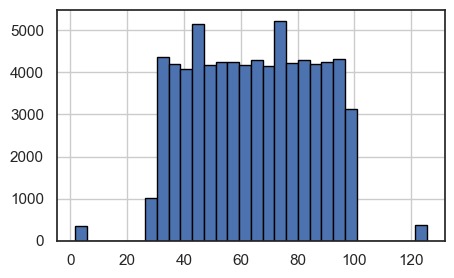

In [ ]:
#DRI: podiamos remover outliers, mas depois com os dados reais, se aparecer um 0 ou um 120 como é que ele calcula o preço?
train_data['paint_quality'].hist(figsize = (5, 3), bins = 30, edgecolor = 'black')
plt.show()

In [ ]:
# DRI: há imensa variação de preço...
train_data[train_data.paint_quality > 100].price.describe()

count      367.000000
mean     16089.386921
std       8780.019114
min        950.000000
25%       9995.000000
50%      14056.000000
75%      19995.000000
max      60399.000000
Name: price, dtype: float64

### 5.3.3. has_damage: is always 0. No car damage?

In [ ]:
# DRI: preço de carros False
train_data[train_data.has_damage == False].price.describe()

count     74421.000000
mean      16883.327287
std        9749.731793
min         450.000000
25%       10200.000000
50%       14698.000000
75%       20950.000000
max      159999.000000
Name: price, dtype: float64

In [ ]:
# DRI: preço de carros True
train_data[train_data.has_damage == True].price.describe()

count     1548.000000
mean     16818.284238
std       9110.626140
min        899.000000
25%      10291.000000
50%      14798.000000
75%      20999.000000
max      82099.000000
Name: price, dtype: float64

In [ ]:
# DRI: estava a pensar se poderiamos criar um threshold para o qual consideramos que é 1, ou seja, se o preço for abaixo de x
# assumimos que o carro tem damage. Mas acho que não dá porque o menor preço dos NaN é maior que o menor preço dos 0's...

# Podemos assumir que são tudo 0's e dizemos que o vendedor só marca se tiver estrago e portanto esqueceu-se

In [ ]:
# DRI: os dados do test também só têm 0's. WHAT THE HELLL?!?! ESTOU FARTA DISTO
test_data.hasDamage.describe()

count    31970.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: hasDamage, dtype: float64

## 5.4. Remove outliers

In [ ]:
numeric_columns.remove('has_damage')
categorical_columns.append('has_damage')
print(f'All columns: {list(independent_columns)} \nNumerical: {numeric_columns} \nCategorical: {categorical_columns}')

All columns: ['brand', 'model', 'year', 'transmission', 'mileage', 'fuel_type', 'tax', 'mpg', 'engine_size', 'paint_quality', 'previous_owners', 'has_damage'] 
Numerical: ['year', 'mileage', 'tax', 'mpg', 'engine_size', 'paint_quality', 'previous_owners'] 
Categorical: ['brand', 'model', 'transmission', 'fuel_type', 'has_damage']


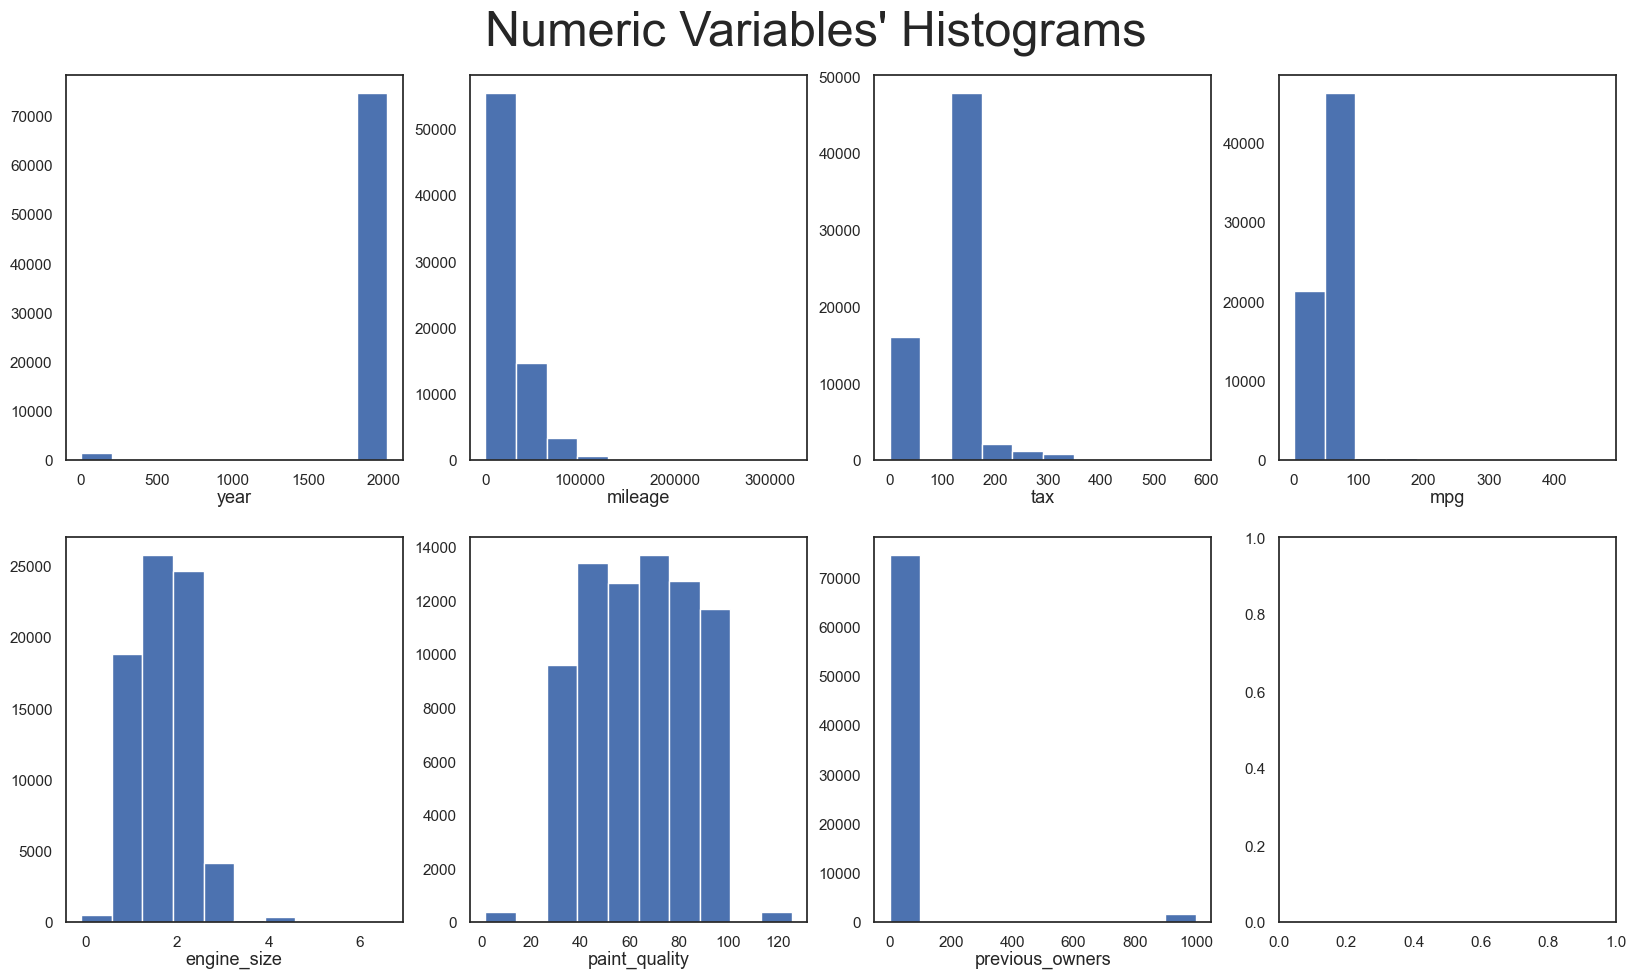

In [ ]:
# Plot ALL Numeric Variables' Histograms in one figure
sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), numeric_columns):
    ax.hist(train_data[feat])
    ax.set_title(feat, y=-0.13, fontsize=13)
    
# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title, y=.94, fontsize=35)

plt.show()

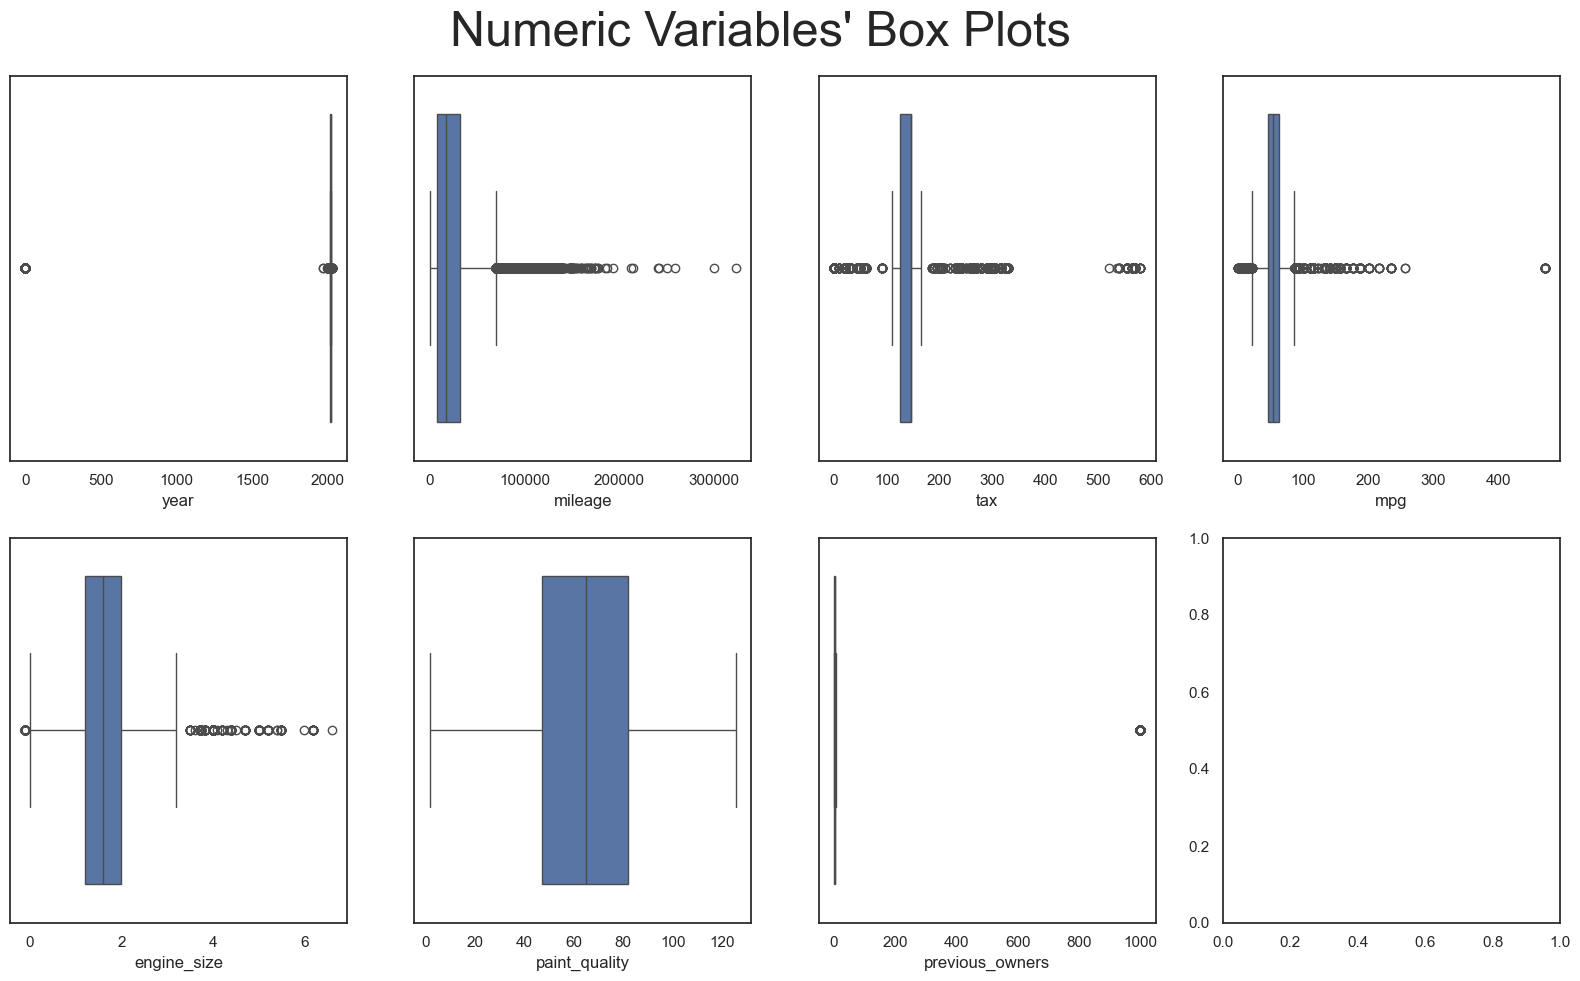

In [ ]:
# Plot ALL Numeric Variables' Boxplots in one figure

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each boxplot:
for ax, feat in zip(axes.flatten(), numeric_columns):
    sns.boxplot(x=train_data[feat], ax=ax)
    
# Layout
title = "Numeric Variables' Box Plots"
plt.suptitle(title, y=.94, fontsize=35)

plt.show()

`Year:` has a lot of outliers but they should not be removed

`Mileage, tax, mpg, engine size:` should not be negative AND has a few outliers that we can remove we can remove

`Paint quality:` should not be over 100

`Previous owners:` should not be negative

<span style='color: red;'>Não sei se apagamos tudo (perdemos 4% dos dados) ou se substituimos por positivos (Ex: - 4 passa a 4).</span>

In [ ]:
dim = len(train_data)

In [ ]:
# previous_owners
(len(train_data[train_data.previous_owners < 0])*100)/dim                          #menos de 1%

0.0

In [ ]:
# mileage
(len(train_data[train_data.mileage < 0])*100)/dim                                 #menos de 1%

0.0

In [ ]:
# mpg
(len(train_data[train_data.mpg < 0])*100)/dim                                     #menos de 0.1% AND são todos -43.421768

0.0

In [ ]:
# engine_size
(len(train_data[train_data.engine_size < 0])*100)/dim                              #menos de 1% AND são todos -0.103493

0.11057141728863089

In [ ]:
# tax
(len(train_data[train_data.tax < 0])*100)/dim                                     #menos de 1%

0.0

In [ ]:
train_data[train_data.tax < 0].tax.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: tax, dtype: float64

## 5.5. Data separation

In [ ]:
X = train_data.loc[:, list(independent_columns)]
y = train_data.loc[:,'price']

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size = 0.7, shuffle = True)

## 5.6. Fill missing values

In [ ]:
#for column in categorical_columns:
 #   X_train[column] = X_train[column].fillna('Unknown')
  #  X_validation[column] = X_validation[column].fillna('Unknown')

In [ ]:
# Turn strings into the NaN in the categorical columns
for column in categorical_columns:
    X_train[column].replace('nan', np.nan, inplace=True)

In [ ]:
# Bring back the NaN values in year, previous_owners and has_damage
X_train.year.replace(0, np.nan, inplace=True)
X_train.previous_owners.replace(1000, np.nan, inplace=True)
X_train.has_damage.replace(True, np.nan, inplace=True)

In [ ]:
X_train.isna().sum()

brand              1054
model              1055
year               1044
transmission       1053
mileage            1356
fuel_type          1025
tax                5523
mpg                5578
engine_size        1049
paint_quality      1092
previous_owners    1065
has_damage         1075
dtype: int64

We need to fix: numeric and categorical columns.

In [ ]:
# Calculate the mean for each metric feature
means = X_train[numeric_columns].mean()

# Calculate the median for each metric feature
medians = X_train[numeric_columns].median()

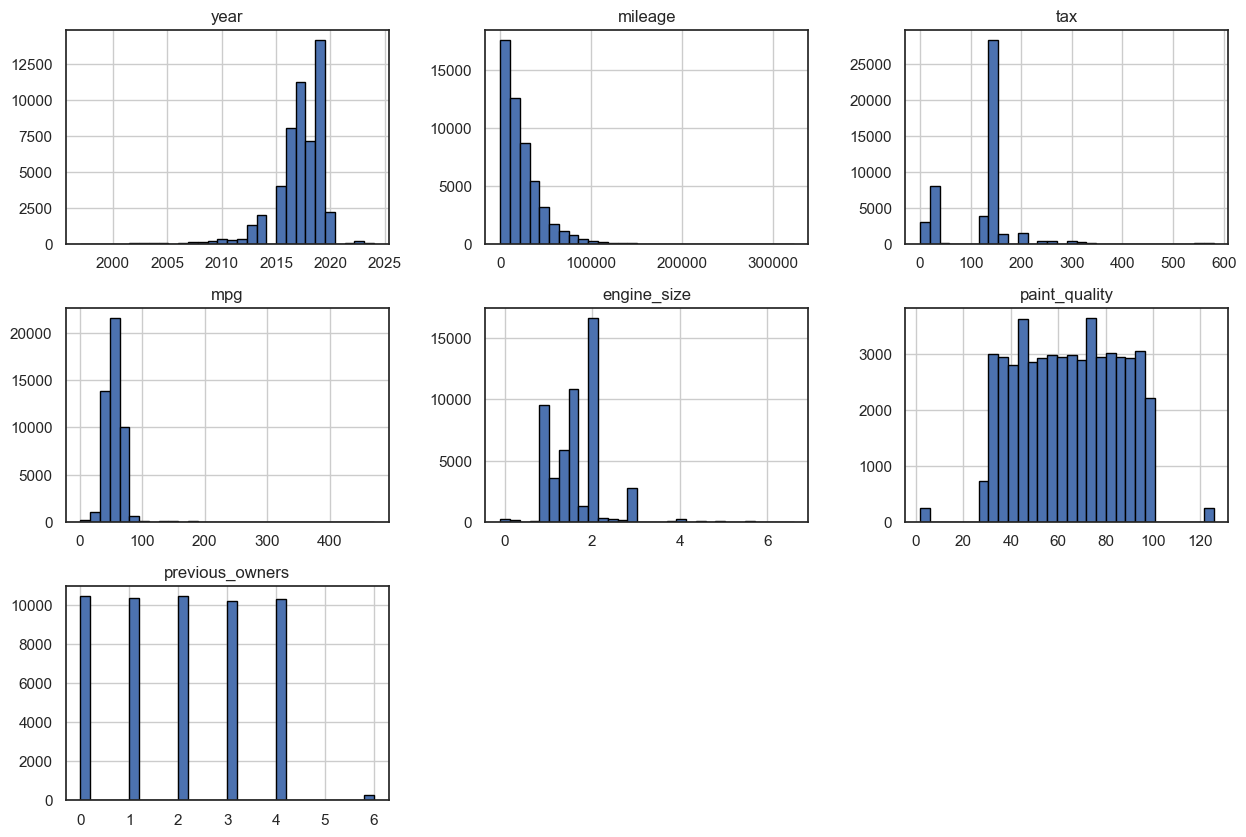

In [ ]:
# Do an histogram for each metric feature to choose which method we will use to fill the missing values with
X_train[numeric_columns].hist(
    figsize = (15, 10),
    bins = 30,
    edgecolor = 'black',
)

plt.show()

### 5.6.1. Year

In [ ]:
year = X_train.year
mean_year = means.year
median_year = medians.year

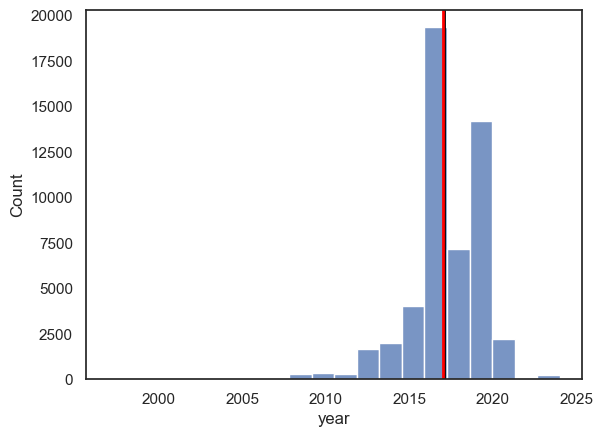

In [ ]:
fig, ax = plt.subplots()

sns.histplot(year, bins=20)

ax.axvline(mean_year, color='black', linewidth=2)
ax.axvline(median_year, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_year} \nMedian: {median_year}')

Mean: 2017.0900372118003 
Median: 2017.0


Since they're (almost) the same:

In [ ]:
X_train.year = X_train.year.fillna(round(mean_year))

And,

In [ ]:
X_validation.year = X_validation.year.fillna(round(mean_year))

### 5.6.2. Mileage

In [ ]:
mileage = X_train.mileage
mean_mileage = means.mileage
median_mileage = medians.mileage

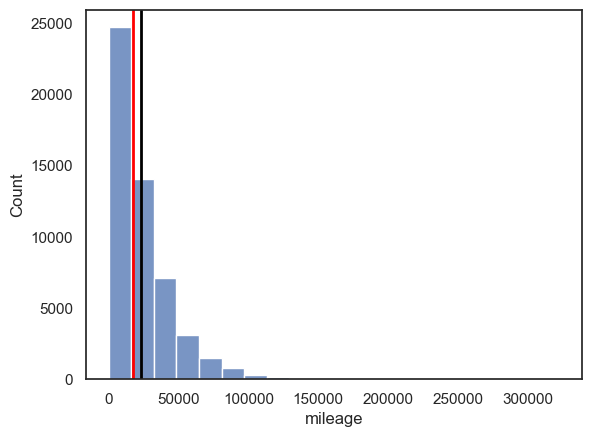

In [ ]:
fig, ax = plt.subplots()

sns.histplot(mileage, bins=20)

ax.axvline(mean_mileage, color='black', linewidth=2)
ax.axvline(median_mileage, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_mileage} \nMedian: {median_mileage}')

Mean: 23301.206444833253 
Median: 17339.0


Let's change into the median: ??????????????????????????????????????????????????????????????????????????????????????????????????

In [ ]:
X_train.mileage = X_train.mileage.fillna(round(median_mileage))

And,

In [ ]:
X_validation.mileage = X_validation.mileage.fillna(round(median_mileage))

### 5.6.3. Tax

In [ ]:
tax = X_train.tax
mean_tax = means.tax
median_tax = medians.tax

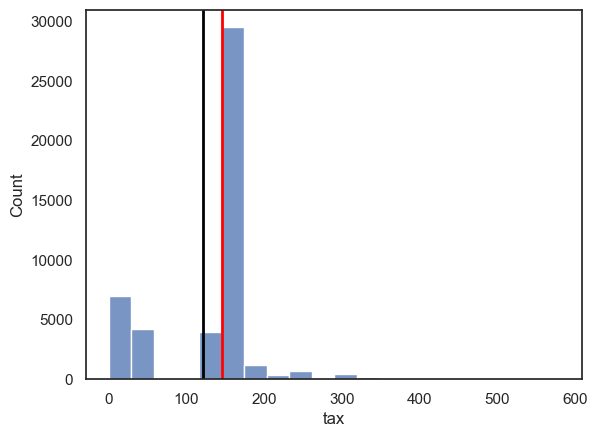

In [ ]:
fig, ax = plt.subplots()

sns.histplot(tax, bins=20)

ax.axvline(mean_tax, color='black', linewidth=2)
ax.axvline(median_tax, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_tax} \nMedian: {median_tax}')

Mean: 121.11514926344698 
Median: 145.0


Let's change into the median: ??????????????????????????????????????????????????????????????????????????????????????????????????

In [ ]:
X_train.tax = X_train.tax.fillna(round(median_tax))

And,

In [ ]:
X_validation.tax = X_validation.tax.fillna(round(median_tax))

### 5.6.4. Mpg

In [ ]:
mpg = X_train.mpg
mean_mpg = means.mpg
median_mpg = medians.mpg

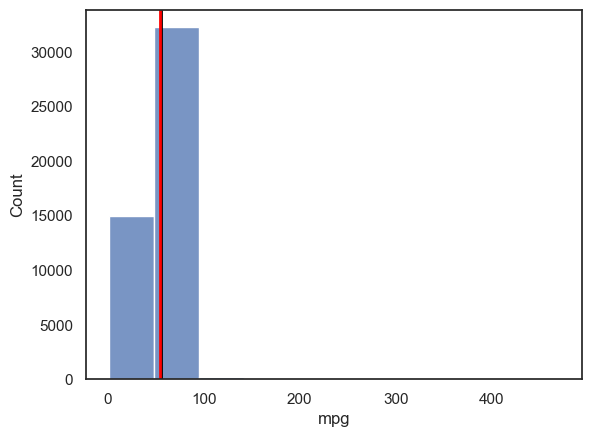

In [ ]:
fig, ax = plt.subplots()

sns.histplot(mpg, bins=10)

ax.axvline(mean_mpg, color='black', linewidth=2)
ax.axvline(median_mpg, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_mpg} \nMedian: {median_mpg}')

Mean: 55.18470682727976 
Median: 54.3


Since they're (almost) the same:

In [ ]:
X_train.mpg = X_train.mpg.fillna(round(mean_mpg))

And,

In [ ]:
X_validation.mpg = X_validation.mpg.fillna(round(mean_mpg))

### 5.6.5. Engine size

In [ ]:
engine_size = X_train.engine_size
mean_engine_size = means.engine_size
median_engine_size = medians.engine_size

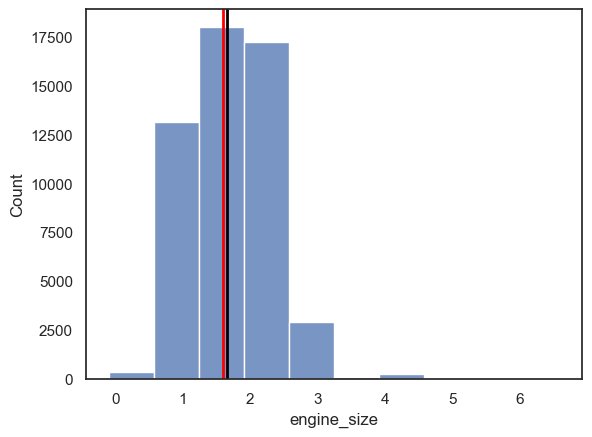

In [ ]:
fig, ax = plt.subplots()

sns.histplot(engine_size, bins=10)

ax.axvline(mean_engine_size, color='black', linewidth=2)
ax.axvline(median_engine_size, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_engine_size} \nMedian: {median_engine_size}')

Mean: 1.6599182794645717 
Median: 1.6


Since they're (almost) the same:

In [ ]:
X_train.engine_size = X_train.engine_size.fillna(round(median_engine_size))

And,

In [ ]:
X_validation.engine_size = X_validation.engine_size.fillna(round(median_engine_size))

### 5.6.6. Paint quality

In [ ]:
paint_quality = X_train['paint_quality']
mean_paint_quality = means['paint_quality']
median_paint_quality = medians['paint_quality']

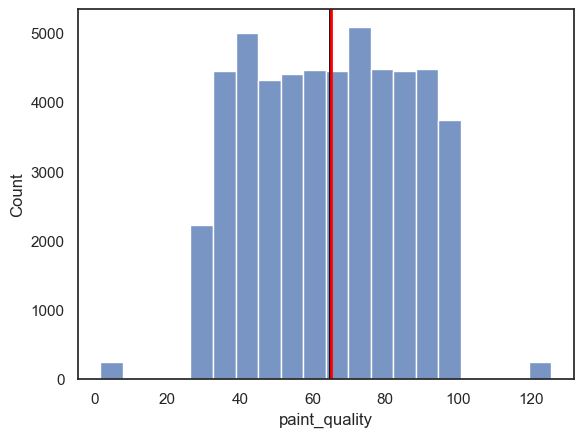

In [ ]:
fig, ax = plt.subplots()

sns.histplot(paint_quality, bins=20)

ax.axvline(mean_paint_quality, color='black', linewidth=2)
ax.axvline(median_paint_quality, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_paint_quality} \nMedian: {median_paint_quality}')

Mean: 64.66322588690281 
Median: 65.0


Since they're (almost) the same:

In [ ]:
X_train['paint_quality'] = X_train['paint_quality'].fillna(round(median_paint_quality))

And,

In [ ]:
X_validation['paint_quality'] = X_validation['paint_quality'].fillna(round(median_paint_quality))

### 5.6.7. Previous owners

In [ ]:
previous_owners = X_train.previous_owners
mean_previous_owners = means.previous_owners
median_previous_owners = medians.previous_owners

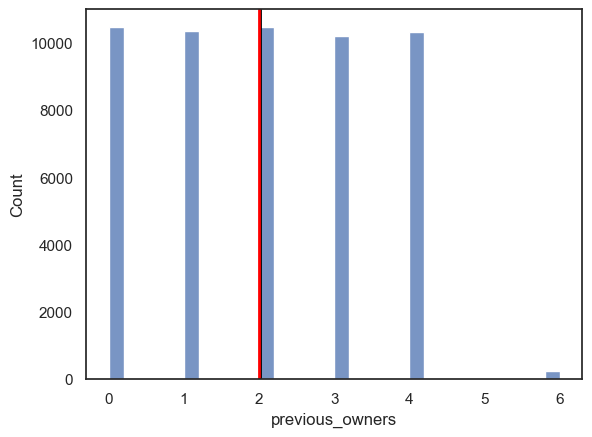

In [ ]:
fig, ax = plt.subplots()

sns.histplot(previous_owners, bins=30)

ax.axvline(mean_previous_owners, color='black', linewidth=2)
ax.axvline(median_previous_owners, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_previous_owners} \nMedian: {median_previous_owners}')

Mean: 2.0106883119375203 
Median: 2.0


Since they're (almost) the same:

In [ ]:
X_train.previous_owners = X_train.previous_owners.fillna(round(median_previous_owners))

And,

In [ ]:
X_validation.previous_owners = X_validation.previous_owners.fillna(round(median_previous_owners))

### <span style='color: red;'>5.6.8. Has damage</span> 

Don't know how to do this one, because it's always 0. Should we assume that when it doesn't say it's 0 or 1<span style='color: red;'>?????????????????????????????????????????</span>

Foi substituido por True, sem querer...

### 5.6.9. Brand

In [ ]:
# Sort the dataframe by model and brand to easily identify similar entries
X_train.sort_values(by=['model', 'brand'], ascending=[True, True], inplace=True)
X_train

,brand,model,year,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners,has_damage
car_id,,,,,,,,,,,,
8952,BMW,1 Series,2016.0,Manual,31095.0,Diesel,0.0,83.1,1.500000,49.0,1.0,False
12491,BMW,1 Series,2016.0,Automatic,24592.0,Diesel,20.0,68.9,2.000000,69.0,4.0,False
9165,BMW,1 Series,2020.0,Semi-Auto,1560.0,Diesel,150.0,48.7,2.000000,88.0,0.0,False
9157,BMW,1 Series,2019.0,Manual,17339.0,Petrol,145.0,44.1,1.500000,92.0,0.0,False
9953,BMW,1 Series,2016.0,Automatic,26000.0,NaN,125.0,54.3,1.500000,41.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
24435,NaN,NaN,2019.0,Manual,12142.0,Petrol,145.0,55.0,1.000000,53.0,1.0,False
16342,NaN,NaN,2017.0,Manual,28820.0,Diesel,0.0,74.4,1.500000,65.0,0.0,False
13026,NaN,NaN,2014.0,Semi-Auto,38689.0,Petrol,235.0,37.7,3.000000,96.0,3.0,False


In [ ]:
# Save the DataFrame to a CSV file at the specified path
#train_data OU X_train
#train_data.to_csv(r'C:\Users\mafal\Documents\MSc Data Science\1st Semester\Machine Learning\Project\train_data_sorted.csv', index=False)

In [ ]:
# Create a mask where 'model' is not NaN
mask = X_train['model'].notna()
mask

car_id
8952      True
12491     True
9165      True
9157      True
9953      True
         ...  
24435    False
16342    False
13026    False
44380    False
46984    False
Name: model, Length: 53178, dtype: bool

In [ ]:
# Before filling missing values, let's save the indexes that we need to fill, so we can confirm they were changed right
index_no_brand = list(X_train[X_train.brand.isna()].index)

In [ ]:
# Fill missing brand values by forward filling from previous entries but only if model is not NaN
X_train.loc[mask, 'brand'] = X_train.loc[mask, 'brand'].ffill()

<span style='color: red;'>Como é que fazemos para X_validation? Criamos uma função que percorre o brands_to_models e ve que brand tem aquele model?</span> 

In [ ]:
# Confirming the new brands match the corresponding model. It would return the rows in which the brand and model don't match.
for i in index_no_brand:                             # We can also do: for i in X_train.index
    if str(X_train.loc[i].brand) != 'nan':
        if str(X_train.loc[i].model) != 'nan':
            condition1 = X_train.loc[i].model not in brand_to_model[X_train.loc[i].brand]
            condition2 = (X_train.loc[i].model != 'Unknown')
            condition3 = (X_train.loc[i].model != np.nan)
            if condition1 and condition2 and condition3:
                print(X_train.loc[i])

In [ ]:
# Save the DataFrame to a CSV file at the specified path
#train_data.to_csv(r'C:\Users\mafal\Documents\MSc Data Science\1st Semester\Machine Learning\Project\train_data_brand_clean.csv', index=False)

### 5.6.10. Model

Sabendo só a marca é impossivel determinar a que marca o carro pertence.
<span style='color: red;'>O que fazemos a esses dados?</span>

### 5.6.11.Transmission

<span style='color: red;'>???</span>

### 5.6.12. Fuel type

<span style='color: red;'>???</span>

### 5.6.13. Confirmation

In [ ]:
X_train.isna().sum()

brand                23
model              1055
year                  0
transmission       1053
mileage               0
fuel_type          1025
tax                   0
mpg                   0
engine_size           0
paint_quality         0
previous_owners       0
has_damage         1075
dtype: int64

## 5.7. Feature engineering

In [ ]:
X_train.drop(columns = ['brand', 'model', 'transmission', 'fuel_type', 'has_damage']).corr(method = 'spearman')

,year,mileage,tax,mpg,engine_size,paint_quality,previous_owners
year,1.000000,-0.770002,0.300708,-0.291373,-0.040086,0.007214,0.001685
mileage,-0.770002,1.000000,-0.240116,0.301429,0.094960,-0.003894,0.004204
tax,0.300708,-0.240116,1.000000,-0.534938,0.151361,0.000199,0.002216
mpg,-0.291373,0.301429,-0.534938,1.000000,-0.186448,-0.000565,-0.003872
engine_size,-0.040086,0.094960,0.151361,-0.186448,1.000000,0.003706,0.006082
paint_quality,0.007214,-0.003894,0.000199,-0.000565,0.003706,1.000000,-0.004257
previous_owners,0.001685,0.004204,0.002216,-0.003872,0.006082,-0.004257,1.000000


To note:
- The linear correlation between mileage and year is strangely high.

## 5.8. Normalize data

# 6. Function with every change so far

# 7. Modelling (create a predictive model)

In [ ]:
#dt = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
#predictions_train = dt.predict(X_train)

In [ ]:
#predictions_val = dt.predict(X_validation)

# 8. Assess (evaluate model)

In [ ]:
#dt.score(X_train, y_train)         #should be 1

In [ ]:
#dt.score(X_validation, y_validation)

In [ ]:
#confusion_matrix(y_train, predictions_train)

In [ ]:
#confusion_matrix(y_validation, predictions_val)

# 9. Deploy (apply to real data)

In [ ]:
#test_data

In [ ]:
#test_data['price'] = dt.predict(test_data)

In [ ]:
#test_data

In [ ]:
#test_data['price'].to_csv('project_data/project_predictions.csv')